In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_experimentos.zip?raw=true', compression = 'zip')

df.head()

# Cada linha = Cultura de célula
# Expressão Gênica

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,...,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,...,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,...,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,...,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,...,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


In [4]:
df.shape

(23814, 877)

In [5]:
df['tratamento'].unique()

array(['com_droga', 'com_controle'], dtype=object)

In [6]:
df['tempo'].unique()

array([24, 72, 48], dtype=int64)

In [7]:
df['dose'].unique()

array(['D1', 'D2'], dtype=object)

In [8]:
df['droga'].unique()

array(['b68db1d53', 'df89a8e5a', '18bb41b2c', ..., '573c787a2',
       'b2fe3eca7', 'dd4a96d16'], dtype=object)

In [9]:
df['g-0'].unique()

array([ 1.062 ,  0.0743,  0.628 , ...,  0.3942,  0.666 , -0.8598])

In [10]:
df['tratamento'].value_counts()

com_droga       21948
com_controle     1866
Name: tratamento, dtype: int64

In [11]:
df['dose'].value_counts()

D1    12147
D2    11667
Name: dose, dtype: int64

In [12]:
df['dose'].value_counts(normalize=True) * 100

D1    51.007811
D2    48.992189
Name: dose, dtype: float64

<AxesSubplot:>

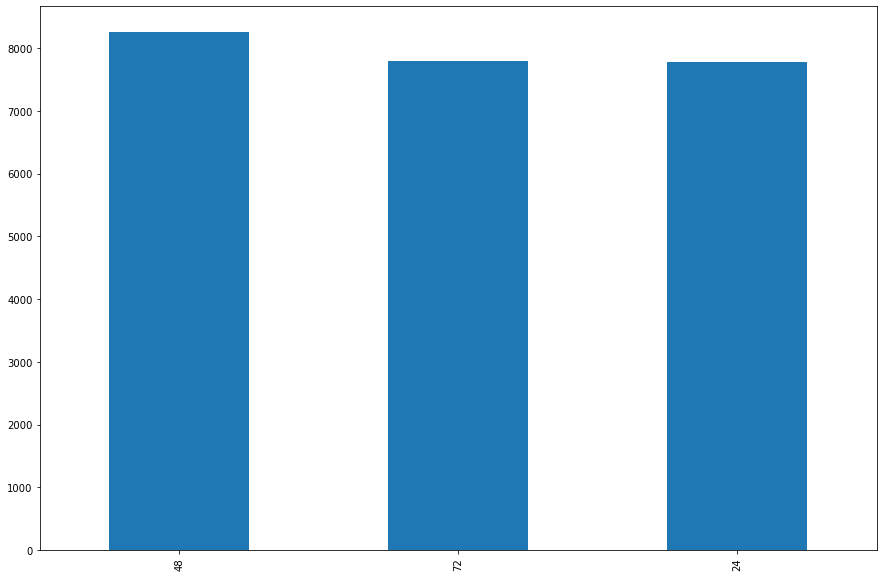

In [13]:
plt.figure(figsize=(15,10))
df['tempo'].value_counts().plot.bar()

In [14]:
MaiorqueZero = df['g-0'] > 0
MaiorqueZero.value_counts()

False    12045
True     11769
Name: g-0, dtype: int64

In [15]:
dados_filtrados = df[df['g-0'] > 0]
dados_filtrados.head()

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,...,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,...,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,...,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
6,id_001bd861f,com_droga,24,D2,746ca1f5a,2.0440,1.7000,-1.5390,5.9440,-2.1670,...,0.1855,1.1720,0.8325,0.6486,0.8090,1.5880,2.4670,0.0357,0.1351,-0.3179
7,id_0020d0484,com_droga,48,D1,8b87a7a83,0.2711,0.5133,-0.1327,2.5950,0.6980,...,0.3230,-0.4140,0.2532,0.0513,0.8600,1.4250,0.6633,0.4562,-0.9622,0.0260


### Desafio 1: Investigar por que a classe tratamento é desbalanceada



In [16]:
df['tratamento'].value_counts(normalize=True) * 100 

com_droga       92.164273
com_controle     7.835727
Name: tratamento, dtype: float64

In [17]:
df.query('tratamento=="com_controle"')['droga'].value_counts()

cacb2b860    1866
Name: droga, dtype: int64

In [18]:
df.query('tratamento=="com_droga"')['droga'].value_counts()

87d714366    718
9f80f3f77    246
8b87a7a83    203
5628cb3ee    202
d08af5d4b    196
            ... 
ddb7e0c01      1
c0521523c      1
0e6ee26ff      1
67c4672f3      1
ed64cad3a      1
Name: droga, Length: 3288, dtype: int64

In [19]:
drogas_comdroga = len(df.query('tratamento=="com_droga"')['droga'].value_counts())
drogas_com_controle = len(df.query('tratamento=="com_controle"')['droga'].value_counts())

print(f'Quantidade de drogas classificadas em tratamento com_droga: {drogas_comdroga}\nQuantidade de drogas classificadas em tratamento com_controle: {drogas_com_controle}')

Quantidade de drogas classificadas em tratamento com_droga: 3288
Quantidade de drogas classificadas em tratamento com_controle: 1


O motivo do desbalanceamento é porque só há uma droga classificado com o tratamento em controle, a droga cacb2b860

### Desafio 2: Plotar as 5 últimas linhas do dataframe

In [20]:
df.tail()

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
23809,id_fffb1ceed,com_droga,24,D2,df1d0a5a1,0.1394,-0.0636,-0.1112,-0.5080,-0.4713,...,0.1969,0.0262,-0.8121,0.3434,0.5372,-0.3246,0.0631,0.9171,0.5258,0.4680
23810,id_fffb70c0c,com_droga,24,D2,ecf3b6b74,-1.3260,0.3478,-0.3743,0.9905,-0.7178,...,0.4286,0.4426,0.0423,-0.3195,-0.8086,-0.9798,-0.2084,-0.1224,-0.2715,0.3689
23811,id_fffc1c3f4,com_controle,48,D2,cacb2b860,0.3942,0.3756,0.3109,-0.7389,0.5505,...,0.5409,0.3755,0.7343,0.2807,0.4116,0.6422,0.2256,0.7592,0.6656,0.3808
23812,id_fffcb9e7c,com_droga,24,D1,8b87a7a83,0.6660,0.2324,0.4392,0.2044,0.8531,...,-0.1105,0.4258,-0.2012,0.1506,1.5230,0.7101,0.1732,0.7015,-0.6290,0.0740
23813,id_ffffdd77b,com_droga,72,D1,972f41291,-0.8598,1.0240,-0.1361,0.7952,-0.3611,...,-3.3890,-1.7450,-6.6300,-4.0950,-7.3860,-1.4160,-3.5770,-0.4775,-2.1500,-4.2520


### Desafio 3: Proporção das classes tratamento


In [21]:
df['tratamento'].value_counts(normalize = True) * 100

com_droga       92.164273
com_controle     7.835727
Name: tratamento, dtype: float64

<AxesSubplot:title={'center':'Distribuição de tratamento nas observações'}, xlabel='Tratamento', ylabel='Quantidade de Ocorrências'>

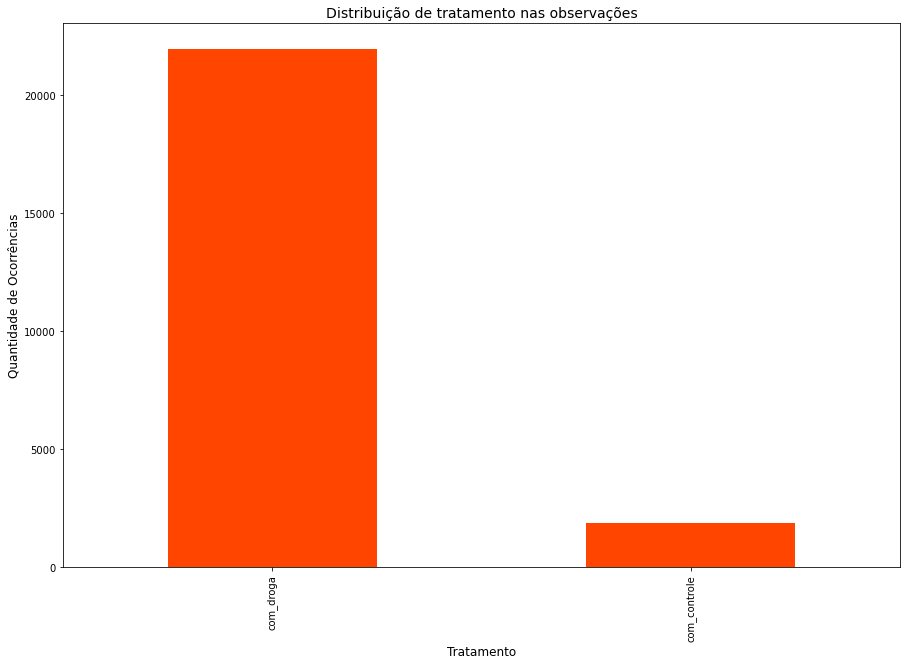

In [22]:
plt.figure(figsize=(15,10))
plt.title("Distribuição de tratamento nas observações", fontsize=14)
plt.xlabel("Tratamento", fontsize=12)
plt.ylabel("Quantidade de Ocorrências", fontsize=12)
df['tratamento'].value_counts().plot.bar(color='orangered')

### Desafio 4: Quantos tipos de drogas foram investigadas


In [23]:
quant_drogas = len(df['droga'].unique())

print(f'Foram investigadas {quant_drogas} drogas')

Foram investigadas 3289 drogas


### Desafio 5: Utilizar Método query (Pandas)



In [25]:
df.query('`g-1` == 0')

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
11211,id_786cb32b0,com_droga,72,D2,a7389b644,10.0000,0.0,3.2060,-0.0898,2.3620,...,-8.9440,-10.0000,-9.8180,-9.1980,-10.000,-8.2030,-10.000,-9.1010,-7.3620,-7.1290
14194,id_98c8fc061,com_droga,48,D2,172d8eb80,-0.0235,0.0,-0.1195,-0.6056,-0.3484,...,0.7159,0.0704,0.5353,-0.8132,-1.249,0.7054,0.310,0.2320,-0.3092,0.3173
16576,id_b220c4c91,com_droga,48,D2,87d714366,4.8900,0.0,1.2310,-0.4738,2.3670,...,-9.4630,-10.0000,-7.5580,-10.0000,-9.612,-9.0640,-10.000,-7.5330,-7.8630,-6.5250
22685,id_f3a99b92c,com_droga,24,D2,2c89382cc,-1.1920,0.0,0.3337,1.3520,-1.6350,...,1.0230,-0.7835,0.0578,0.3239,1.669,-0.0783,1.217,0.1671,-0.6978,-0.7388


### Desafio 6: Retirar os hífens das colunas


In [26]:
for coluna in df.columns:
      if '-' in coluna:
        novaColuna = coluna.replace('-','')
        df.rename(columns={coluna:novaColuna}, inplace=True)
df.head()

,id,tratamento,tempo,dose,droga,g0,g1,g2,g3,g4,...,c90,c91,c92,c93,c94,c95,c96,c97,c98,c99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,...,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,...,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,...,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,...,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,...,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


### Desafio 7: Estilizar Gráficos 


<AxesSubplot:title={'center':'Distribuição de tempo nas observações'}, xlabel='Quantidade de Horas', ylabel='Quantidade de Ocorrências'>

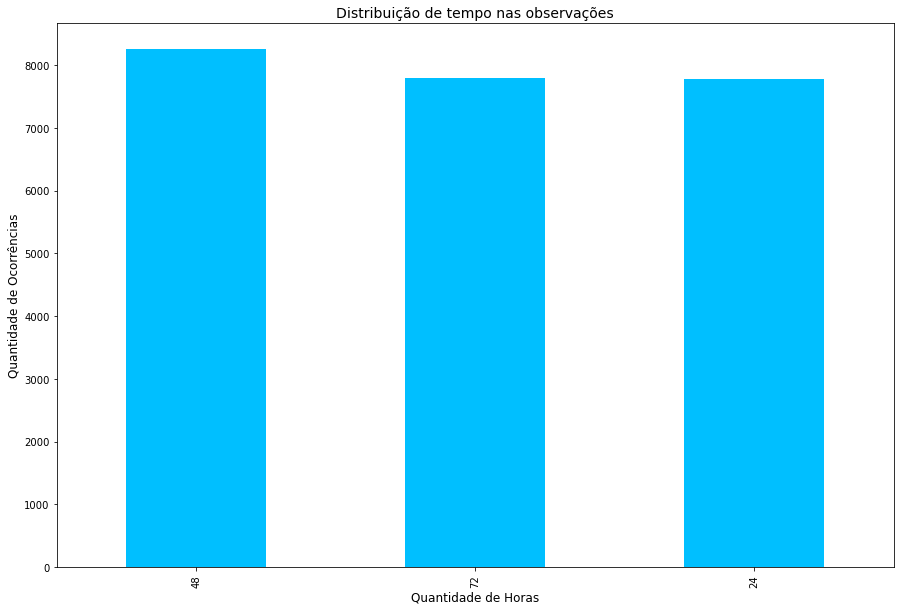

In [27]:
plt.figure(figsize=(15,10))
plt.title("Distribuição de tempo nas observações", fontsize=14)
plt.xlabel("Quantidade de Horas", fontsize=12)
plt.ylabel("Quantidade de Ocorrências", fontsize=12)
df['tempo'].value_counts().plot.bar(color='deepskyblue')

### Desafio 8: Resumo do aprendizado até o momento

1. Compreensão testes biológicos e seus estímulos
2. Distribuição de variáveis do Dataset
3. Plotagem de gráficos para melhor compreensão
4. Uso do Pandas.query para filtrar